In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *

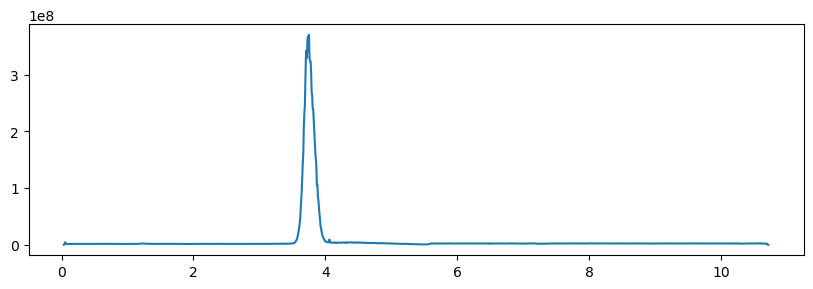

In [2]:
chrom_data = get_chrom_mz5('../demo_data/180205_Poo_TruePoo_Full1.mz5', 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

<StemContainer object of 3 artists>

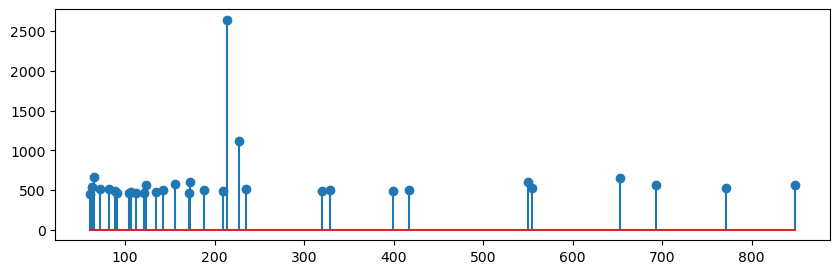

In [3]:
spec_data = get_spec_mz5('../demo_data/180205_Poo_TruePoo_Full1.mz5', 1)
plt.stem(spec_data["mz"], spec_data["int"])

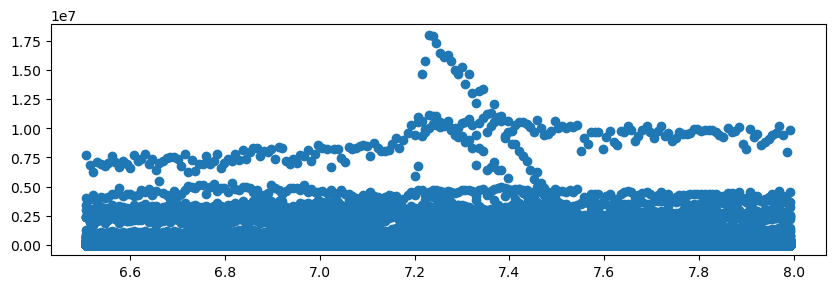

In [4]:
rtrange_data = get_rtrange_mz5("../demo_data/180205_Poo_TruePoo_Full1.mz5", 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

In [5]:
mz5_file = h5py.File("../demo_data/180205_Poo_TruePoo_Full1.mz5", 'r')

In [28]:
mz5_file.keys()

<KeysViewHDF5 ['CVParam', 'CVReference', 'ChomatogramTime', 'ChromatogramIndex', 'ChromatogramIntensity', 'ChromatogramList', 'ChromatogramListBinaryData', 'ControlledVocabulary', 'DataProcessing', 'FileContent', 'FileInformation', 'InstrumentConfiguration', 'ParamGroups', 'RefParam', 'Run', 'Software', 'SourceFiles', 'SpectrumIndex', 'SpectrumIntensity', 'SpectrumListBinaryData', 'SpectrumMZ', 'SpectrumMetaData', 'UserParam']>

In [6]:
scan_idxs = np.concatenate(([0], mz5_file["SpectrumIndex"][...]))

In [37]:
print(len(mz5_file["ChomatogramTime"][...]))
print(mz5_file["ChromatogramIndex"][...])
print(mz5_file["SpectrumIndex"][...])
print(len(mz5_file["SpectrumIndex"][...]))

2729
[2729]
[     34      66     320 ... 1445934 1445966 1446007]
1365


In [43]:
mz5_file["Run"][...]
mz5_file["CVParam"][...]

array([(b'',  1,  0), (b'',  2,  0),
       (b'6e4885bea55ce572e5e4acd686ffed5550d18933',  3,  0), ...,
       (b'900.0', 38, 25), (b'', 19, 18), (b'', 39, 25)],
      dtype=[('value', 'S128'), ('cvRefID', '<u4'), ('uRefID', '<u4')])

In [49]:
mz5_file["SpectrumMetaData"][0]

TypeError: Data type conversion failed (invalid background buffer pointer)

In [9]:
mz5_file.keys()

<KeysViewHDF5 ['CVParam', 'CVReference', 'ChomatogramTime', 'ChromatogramIndex', 'ChromatogramIntensity', 'ChromatogramList', 'ChromatogramListBinaryData', 'ControlledVocabulary', 'DataProcessing', 'FileContent', 'FileInformation', 'InstrumentConfiguration', 'ParamGroups', 'RefParam', 'Run', 'Software', 'SourceFiles', 'SpectrumIndex', 'SpectrumIntensity', 'SpectrumListBinaryData', 'SpectrumMZ', 'SpectrumMetaData', 'UserParam']>

In [26]:
print(mz5_file["SpectrumIndex"][...])
print(len(mz5_file["ChomatogramTime"][...]))

[     34      66     320 ... 1445934 1445966 1446007]
2729


In [18]:
mz5_file["ChomatogramTime"][...]

array([5.4016921e-03, 1.3743259e-02, 2.5676725e-02, ..., 2.1597052e+01,
       2.1608952e+01, 2.1620393e+01])

In [ ]:
scan_dfs = []
for index, rt_val in enumerate(mz5_file["ChomatogramTime"][...]):
    if(rtstart < rt_val < rtend):
        scan_df = pd.DataFrame({
            "rt": rt_val,
            "mz": np.cumsum(mz5_file["SpectrumMZ"][scan_idxs[index]:scan_idxs[index+1]]),
            "int": mz5_file["SpectrumIntensity"][scan_idxs[index]:scan_idxs[index+1]]
        })
        scan_dfs.append(scan_df)
file_df = pd.concat(scan_dfs, ignore_index=True)

In [23]:
mz5_file["SpectrumMZ"][...]

array([ 62.01009369,   2.34294891,   4.16886139, ...,  51.01239014,
        38.91943359, 208.58331299])

In [24]:
mz5_file["SpectrumIntensity"][...]

array([470.18841553, 496.88305664, 547.36602783, ..., 597.54302979,
       595.92034912, 541.18719482])

In [30]:
get_spec_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 0)

,mz,int
0,62.010094,470.188416
1,64.353043,496.883057
2,68.521904,547.366028
3,76.369545,445.280975
4,77.480682,436.751068
5,91.532097,448.595642
6,96.135674,497.077637
7,113.306656,465.111938
8,114.249138,502.628326
9,115.215523,454.598053
